<a href="https://colab.research.google.com/github/KHANmdAFFAN/Data_science/blob/main/adult_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import TweedieRegressor
import warnings
warnings.simplefilter('ignore')

In [2]:
df= pd.read_csv("/content/adult.csv")

                

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [8]:
df.describe().T # rows are converting into columns

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## FINDING '?'

In [10]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [11]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

# HANDLING '?'

In [13]:
df.replace('?' , np.NaN , inplace =True)

In [14]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [15]:
df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [16]:
cols = ['workclass','occupation','native.country']
for col in cols :
  df[col].fillna(df[col].mode()[0],inplace=True)

In [17]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


FEATURE ENGINEERING

In [18]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [19]:
df['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [20]:
df['workclass']=df['workclass'].replace(['Local-gov','State-gov','Federal-gov'],'gov-job')

In [21]:
df['workclass'].value_counts()

Private             24532
gov-job              4351
Self-emp-not-inc     2541
Self-emp-inc         1116
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [22]:
df['marital.status']=df['marital.status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married')
df['marital.status']=df['marital.status'].replace(['Never-married'],'Unmarried')
df['marital.status']=df['marital.status'].replace(['Divorced','Separated','Widowed'],'Married-spouse-absent')

In [23]:
df['marital.status'].value_counts()

Married                  14999
Unmarried                10683
Married-spouse-absent     6879
Name: marital.status, dtype: int64

In [24]:
df['education'] = df['education'].replace(['11th','10th','7th-8th','9th','12th','5th-6th','1st-4th','Preschool','Prof-school','HS-grad'],'school')
df['education'] = df['education'].replace(['Some-college','Bachelors','Masters'],'college')
df['education'] = df['education'].replace(['Assoc-voc','Assoc-acdm'],'Assoc')

In [25]:
df['education'].value_counts()

school       15330
college      14369
Assoc         2449
Doctorate      413
Name: education, dtype: int64

In [26]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [27]:
df['income']=df['income'].replace(['<=50K'],'0')
df['income']=df['income'].replace(['>50K'],'1')


In [28]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

DATA VISUALISATION

In [29]:
pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



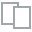
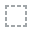
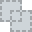
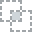
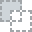
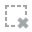
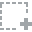
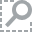
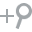
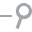
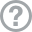
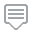
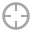
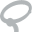
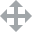
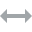
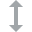
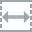
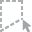
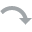
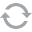
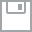
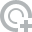
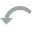
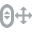
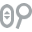
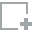
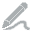
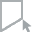
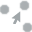
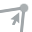
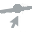

In [30]:
from dataprep.eda import plot
plot(df)

INCOME

In [31]:
df['income'].value_counts()/len(df)*100 # THIS SHOWS VALUES ARE IMBALANCE


0    75.919044
1    24.080956
Name: income, dtype: float64

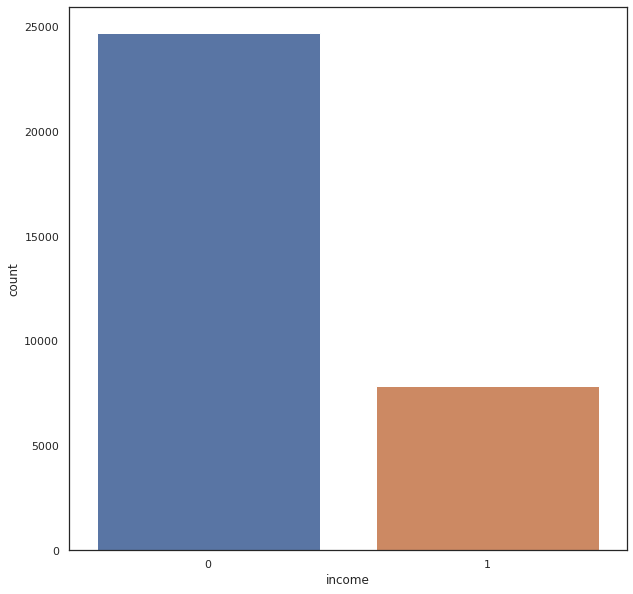

In [32]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.countplot(df['income'])

Text(0.5, 1.0, 'income vs hours per week')

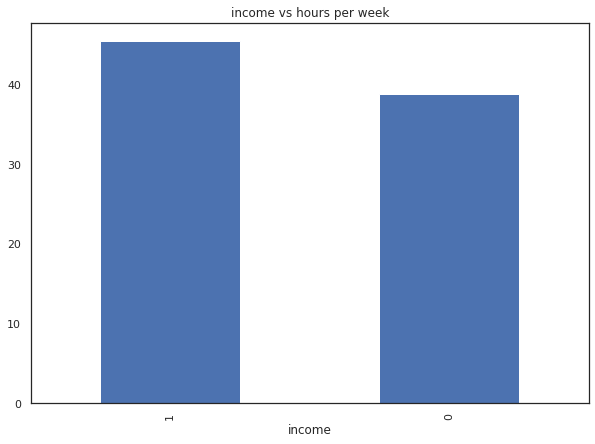

In [33]:
plt.figure(figsize=(10,7))
sns.set_style('white')
df.groupby('income')['hours.per.week'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('income vs hours per week')

EDUCATION VS EDUCATION.NUM

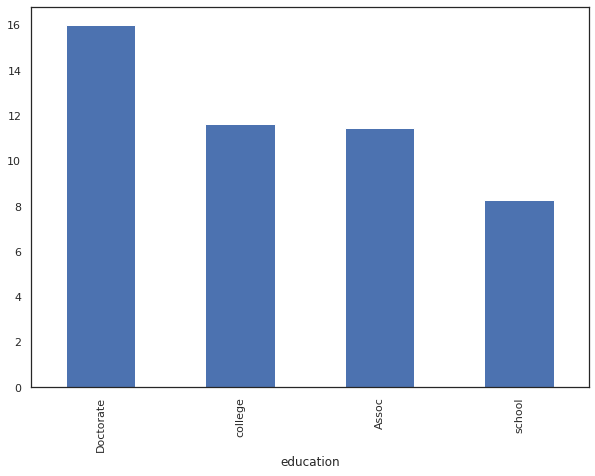

In [34]:
plt.figure(figsize=(10,7))
sns.set_style('white')
df.groupby('education')['education.num'].mean().sort_values(ascending=False).plot(kind='bar')

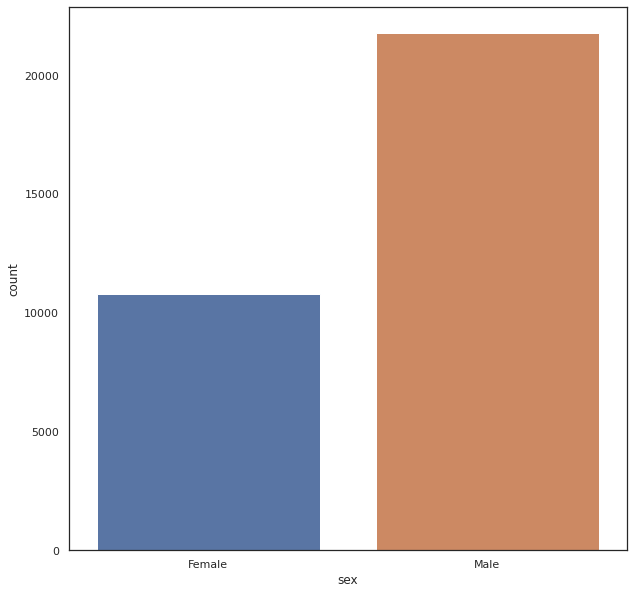

In [35]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.countplot(df['sex'])

Text(0.5, 1.0, 'Marital distribution')

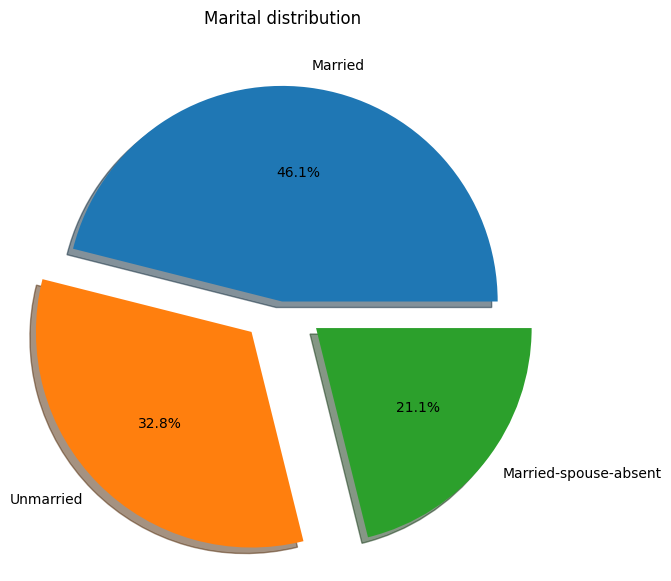

In [36]:
# Creating a pie chart for 'Marital status'
marital = df['marital.status'].value_counts()/len(df)*100
plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels = marital.index, explode=(
    0, 0.20,0.20), shadow=True, autopct='%1.1f%%')     #------- We use autopct to display the percent value using Python string formatting. For example, autopct='%1.1f%%' means that for each pie wedge, the format string is '1.1f%'.
plt.title('Marital distribution')    

Text(0.5, 1.0, 'Relationship')

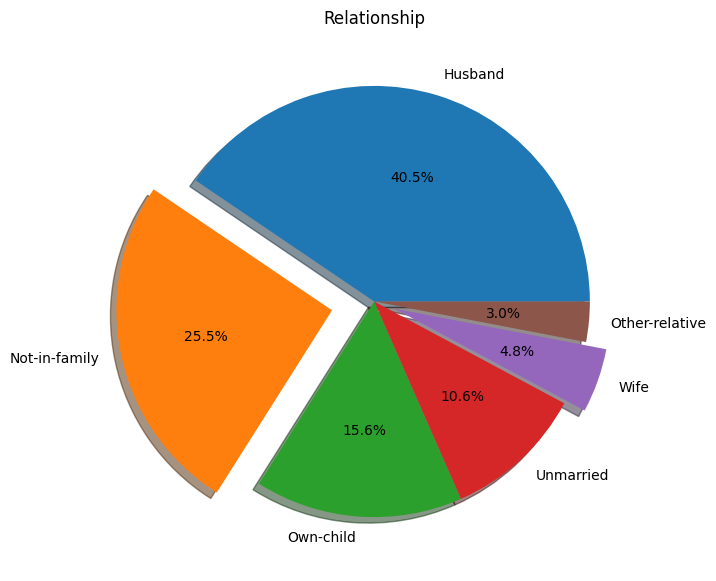

In [37]:
relation_ship = df['relationship'].value_counts()/len(df)*100
plt.figure(figsize=(10,7))
plt.style.use('default')
plt.pie(relation_ship ,labels= relation_ship.index, explode=(0,0.20,0,0,0.1,0),shadow =True , autopct = '%1.1f%%')
plt.title('Relationship')


In [38]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

Text(0.5, 1.0, 'EDUCATION')

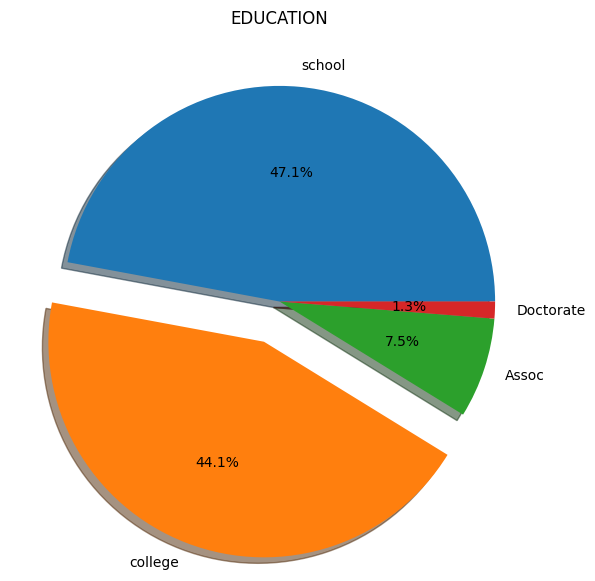

In [39]:
education = df['education'].value_counts()
plt.figure(figsize=(10,7))
plt.style.use('default')
plt.pie(education,labels = education.index,shadow=True,explode=(0,0.20,0,0),autopct='%1.1f%%')
plt.title('EDUCATION')

In [40]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


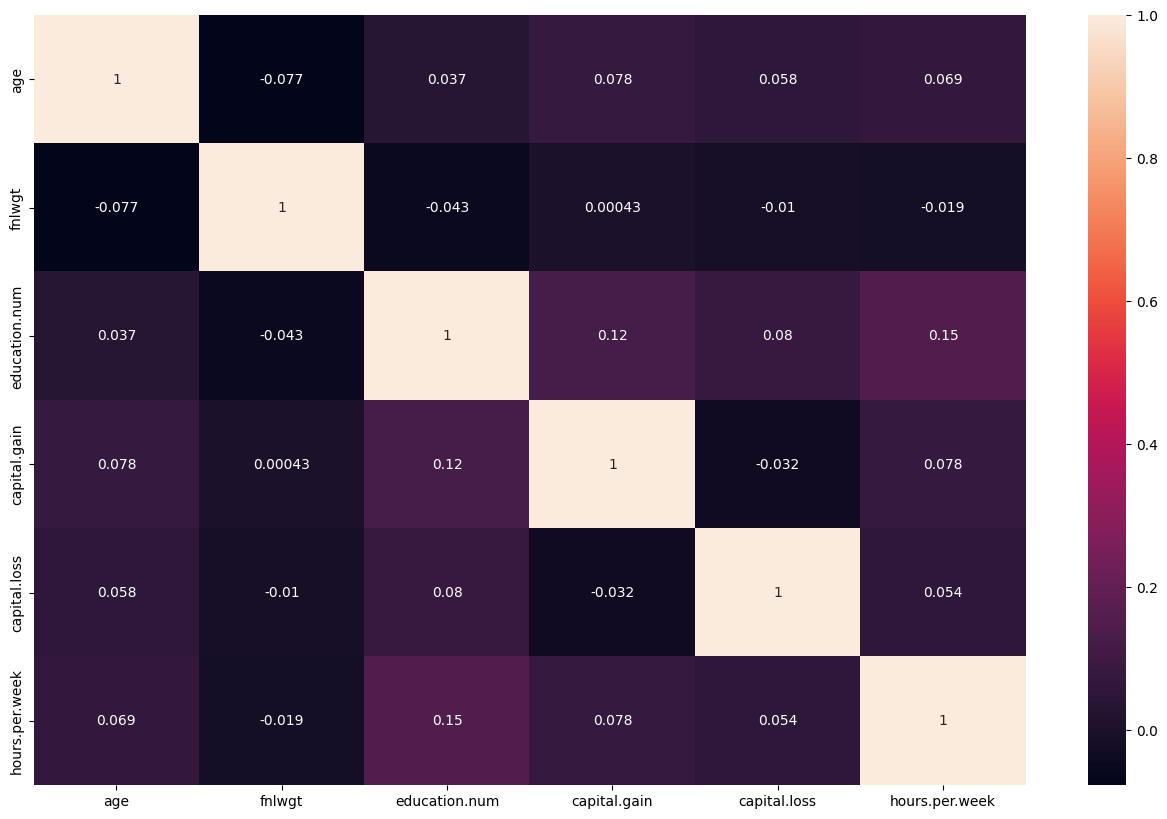

In [41]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

there is no correlation 

CHECKING SKEWNESS

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [42]:
from scipy.stats import skew

In [43]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [44]:
df.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
income             1.212430
dtype: float64

fnlwgt
skewness of columns are :  1.4469134351423292


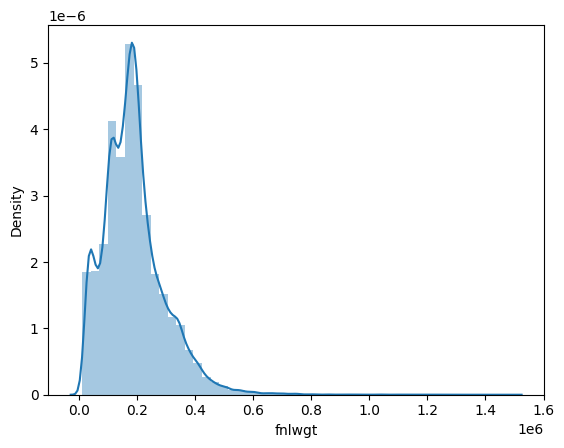

education.num
skewness of columns are :  -0.3116615096354675


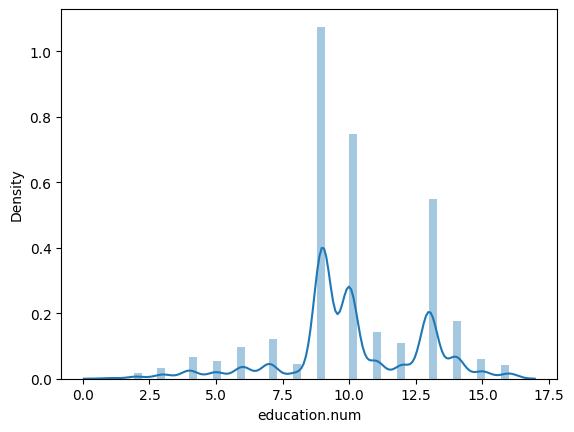

capital.gain
skewness of columns are :  11.953296998194327


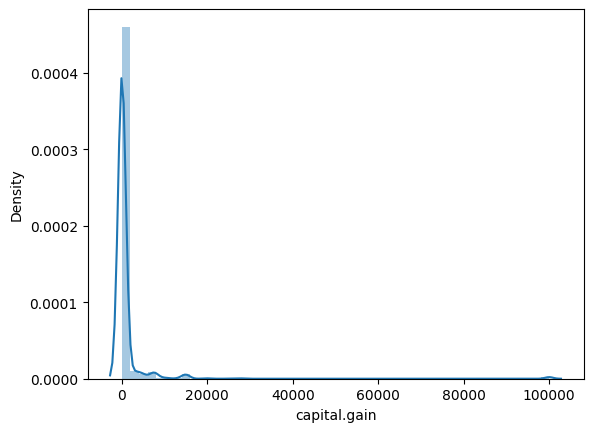

capital.loss
skewness of columns are :  4.594417456439774


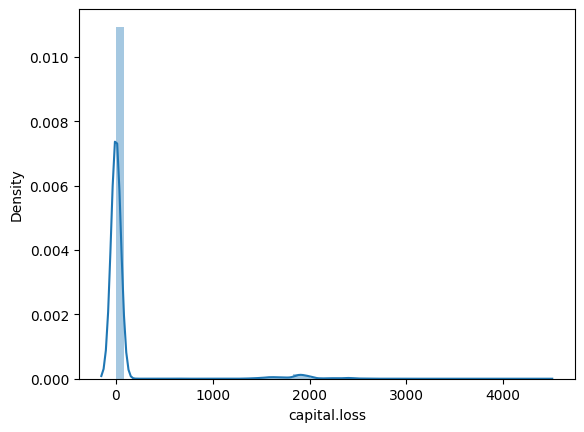

hours.per.week
skewness of columns are :  0.22763204977477705


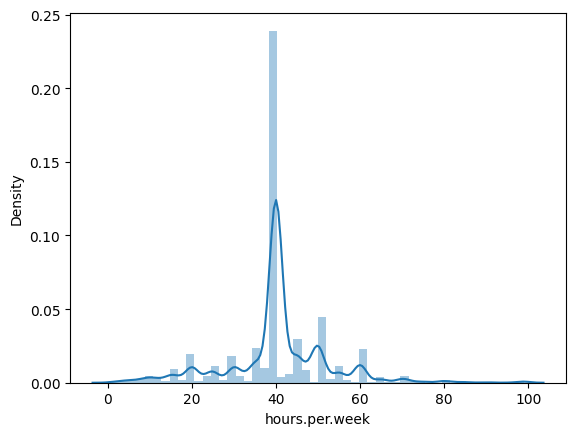

In [45]:
cols = ['fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
for col in cols:
  print(col)
  print("skewness of columns are : ",skew(df[col]))

  plt.figure()
  sns.distplot(df[col],kde=True )

  plt.show()


## HANDLING SKWNESS

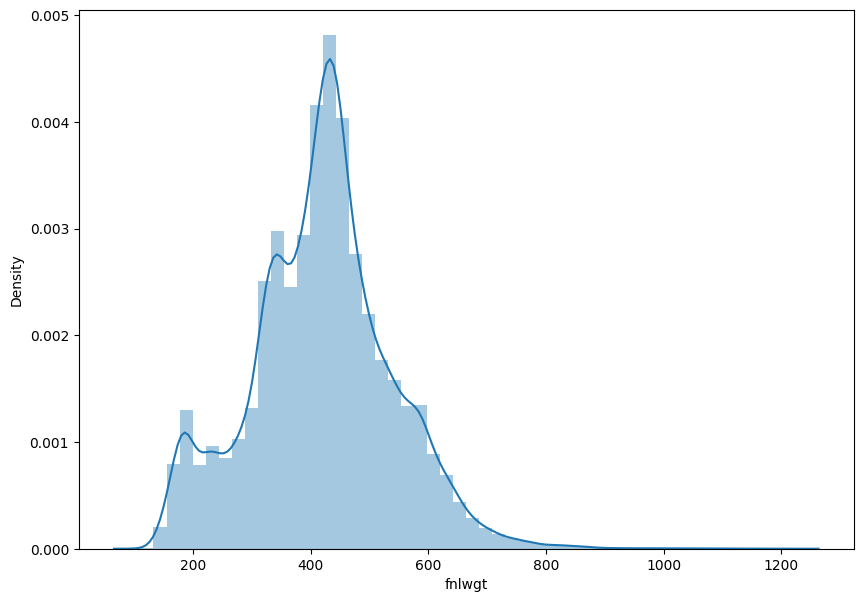

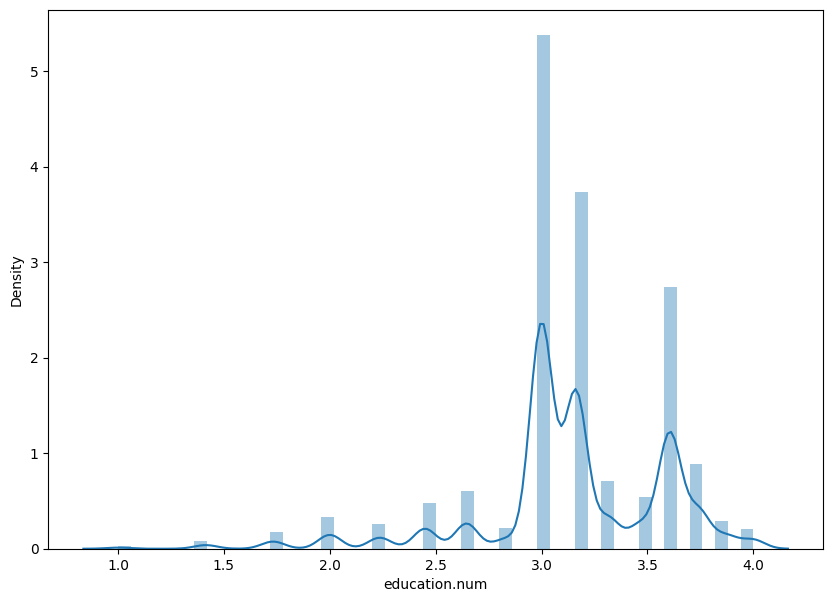

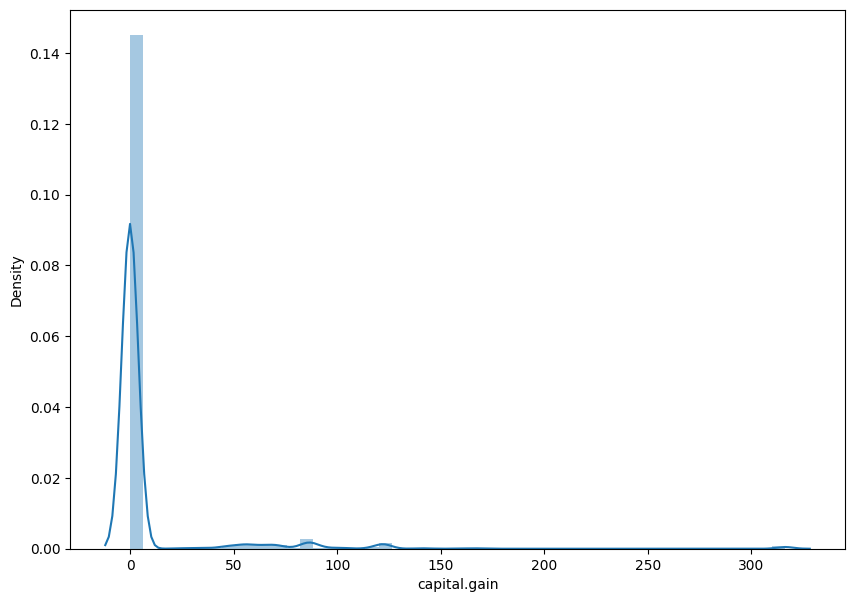

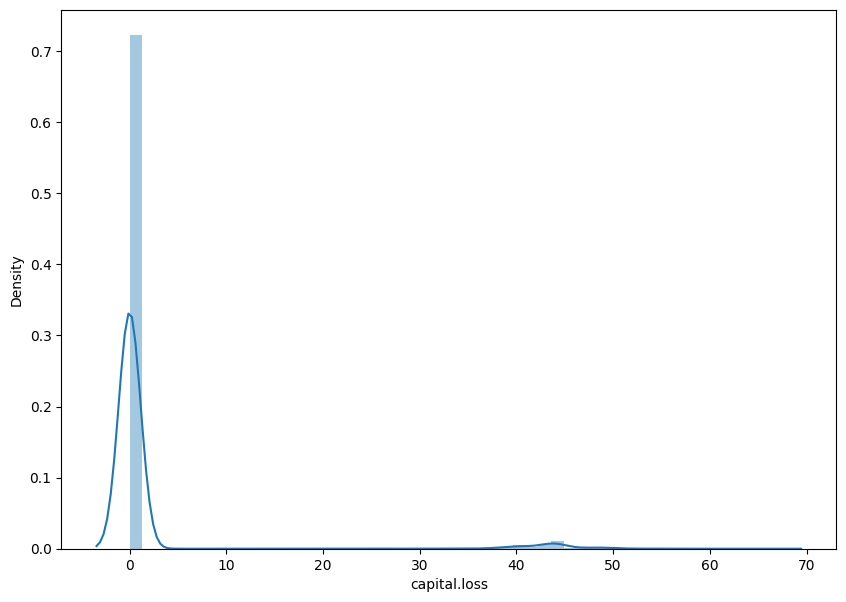

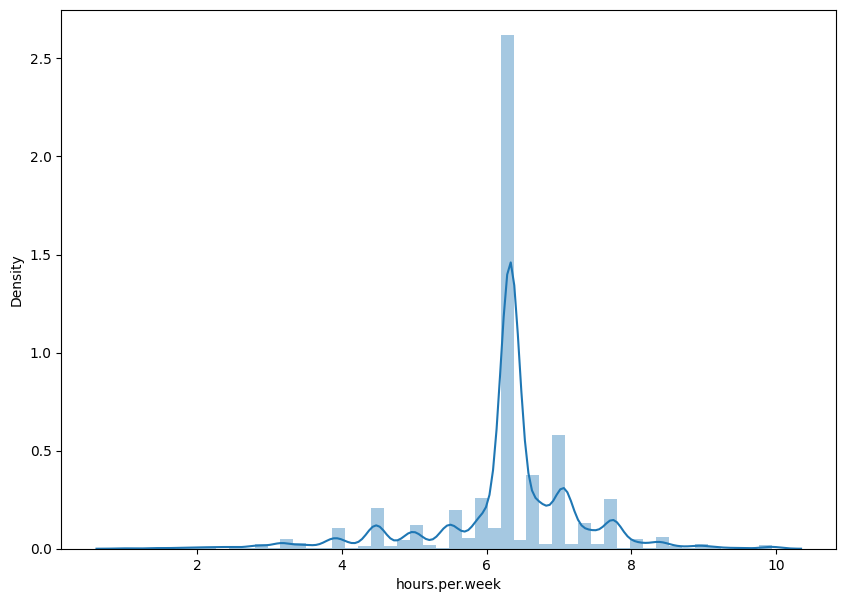

In [46]:
cols = ['fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
for col in cols :
  improve = np.sqrt(df[col])

  plt.figure(figsize=(10,7))
  sns.distplot(improve)
  plt.show()

In [47]:
df['education.num']=np.sqrt(df['education.num'])


In [48]:
df['fnlwgt']=np.sqrt(df['fnlwgt'])


In [49]:
df['hour.per.week']=np.sqrt(df['hours.per.week'])


In [50]:
df['capital.gain']=np.sqrt(df['capital.gain'])

In [51]:
df['capital.loss'] = np.sqrt(df['capital.loss'])

In [52]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
0,90,Private,277.584221,school,3.000000,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0.0,66.00000,40,United-States,0,6.324555
1,82,Private,364.513374,school,3.000000,Married-spouse-absent,Exec-managerial,Not-in-family,White,Female,0.0,66.00000,18,United-States,0,4.242641
2,66,Private,431.347887,college,3.162278,Married-spouse-absent,Prof-specialty,Unmarried,Black,Female,0.0,66.00000,40,United-States,0,6.324555
3,54,Private,374.645165,school,2.000000,Married-spouse-absent,Machine-op-inspct,Unmarried,White,Female,0.0,62.44998,40,United-States,0,6.324555
4,41,Private,514.454080,college,3.162278,Married-spouse-absent,Prof-specialty,Own-child,White,Female,0.0,62.44998,40,United-States,0,6.324555


FINDING OUTLIER

In [54]:
def outlier(value):
  Q1 = value.quantile(0.25)
  Q3 = value.quantile(0.75)
  IQR = Q3-Q1
  lower_limit = Q1-1.5*IQR
  upper_limit = Q3+1.5*IQR
  lower_limit,upper_limit
  print("IQR",IQR,"lower_limit",lower_limit,"upper_limit",upper_limit)
  plot_outlier=plt.boxplot(value)
  return lower_limit,upper_limit,plot_outlier

IQR 20.0 lower_limit -2.0 upper_limit 78.0
outlier of age :  (-2.0, 78.0, {'whiskers': [<matplotlib.lines.Line2D object at 0x7f6ec48a1e50>, <matplotlib.lines.Line2D object at 0x7f6ec48a73d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f6ec48a7910>, <matplotlib.lines.Line2D object at 0x7f6ec48a7e50>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f6ec48a18d0>], 'medians': [<matplotlib.lines.Line2D object at 0x7f6ec48af410>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f6ec48af910>], 'means': []})


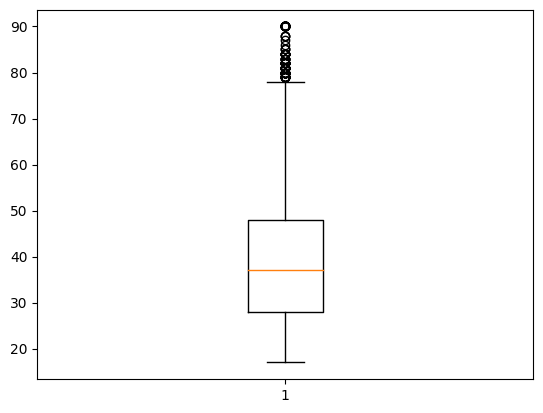

In [55]:
print("outlier of age : ",outlier(df['age']))

IQR 0.4641016151377544 lower_limit 2.3038475772933684 upper_limit 4.1602540378443855
outlier of workclass :  (2.3038475772933684, 4.1602540378443855, {'whiskers': [<matplotlib.lines.Line2D object at 0x7f6ec4814a90>, <matplotlib.lines.Line2D object at 0x7f6ec4814fd0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f6ec4818550>, <matplotlib.lines.Line2D object at 0x7f6ec4818a90>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f6ec4814550>], 'medians': [<matplotlib.lines.Line2D object at 0x7f6ec4821050>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f6ec4821590>], 'means': []})


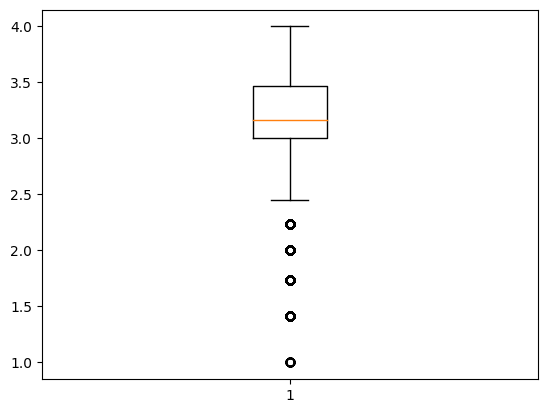

In [56]:
print("outlier of workclass : ",outlier(df['education.num']))

IQR 143.61945788187336 lower_limit 127.83019032514204 upper_limit 702.3080218526354
outlier of fnlwgt :  (127.83019032514204, 702.3080218526354, {'whiskers': [<matplotlib.lines.Line2D object at 0x7f6ec4787290>, <matplotlib.lines.Line2D object at 0x7f6ec47877d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f6ec4787d10>, <matplotlib.lines.Line2D object at 0x7f6ec478c290>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f6ec4780d10>], 'medians': [<matplotlib.lines.Line2D object at 0x7f6ec478c810>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f6ec478cd50>], 'means': []})


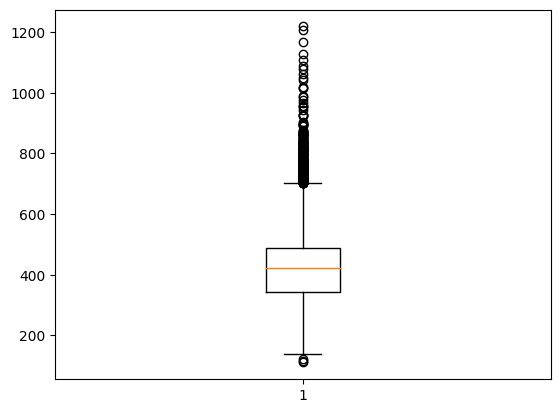

In [57]:
print("outlier of fnlwgt : ",outlier(df['fnlwgt']))

IQR 0.0 lower_limit 0.0 upper_limit 0.0
outlier of capital.gain :  (0.0, 0.0, {'whiskers': [<matplotlib.lines.Line2D object at 0x7f6ec47723d0>, <matplotlib.lines.Line2D object at 0x7f6ec4772910>], 'caps': [<matplotlib.lines.Line2D object at 0x7f6ec4772e50>, <matplotlib.lines.Line2D object at 0x7f6ec477b3d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f6ec476be50>], 'medians': [<matplotlib.lines.Line2D object at 0x7f6ec477b950>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f6ec477be90>], 'means': []})


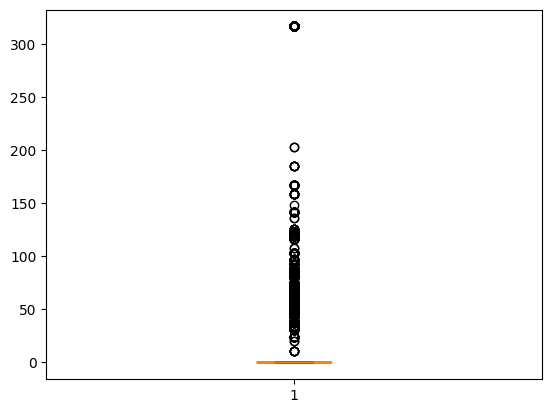

In [58]:
print("outlier of capital.gain : ",outlier(df['capital.gain']))

IQR 0.0 lower_limit 0.0 upper_limit 0.0
outlier of capital.loss :  (0.0, 0.0, {'whiskers': [<matplotlib.lines.Line2D object at 0x7f6ec46df950>, <matplotlib.lines.Line2D object at 0x7f6ec46dfe90>], 'caps': [<matplotlib.lines.Line2D object at 0x7f6ec46e6410>, <matplotlib.lines.Line2D object at 0x7f6ec46e6950>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f6ec46df410>], 'medians': [<matplotlib.lines.Line2D object at 0x7f6ec46e6ed0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f6ec46ee450>], 'means': []})


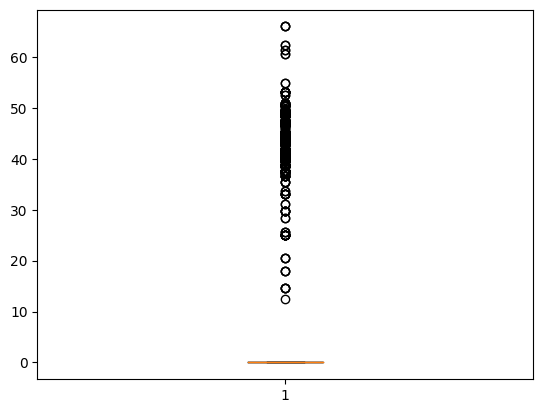

In [59]:
print("outlier of capital.loss : ",outlier(df['capital.loss']))

IQR 0.38364861216261037 lower_limit 5.749082402092844 upper_limit 7.283676850743285
outlier of hour.per.week :  (5.749082402092844, 7.283676850743285, {'whiskers': [<matplotlib.lines.Line2D object at 0x7f6ec464fe10>, <matplotlib.lines.Line2D object at 0x7f6ec4653390>], 'caps': [<matplotlib.lines.Line2D object at 0x7f6ec46538d0>, <matplotlib.lines.Line2D object at 0x7f6ec4653e10>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f6ec464f8d0>], 'medians': [<matplotlib.lines.Line2D object at 0x7f6ec465a3d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f6ec465a910>], 'means': []})


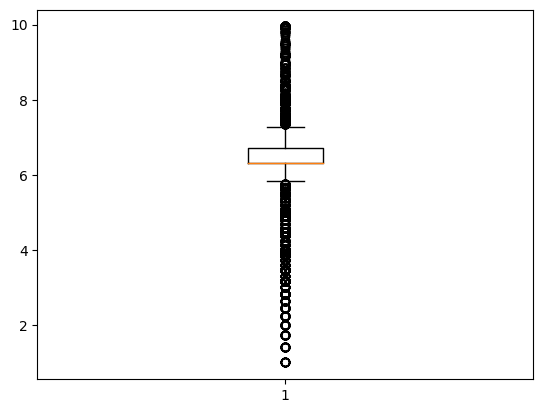

In [60]:
print("outlier of hour.per.week : ",outlier(df['hour.per.week']))

## HANDLING OUTLIER

In [61]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['age']<lower_limit)|(df['age']>upper_limit)]

In [62]:
no_outlier =  df[(df['age']>lower_limit)&(df['age']<upper_limit)]
no_outlier.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
2,66,Private,431.347887,college,3.162278,Married-spouse-absent,Prof-specialty,Unmarried,Black,Female,0.0,66.000000,40,United-States,0,6.324555
3,54,Private,374.645165,school,2.000000,Married-spouse-absent,Machine-op-inspct,Unmarried,White,Female,0.0,62.449980,40,United-States,0,6.324555
4,41,Private,514.454080,college,3.162278,Married-spouse-absent,Prof-specialty,Own-child,White,Female,0.0,62.449980,40,United-States,0,6.324555
5,34,Private,465.686590,school,3.000000,Married-spouse-absent,Other-service,Unmarried,White,Female,0.0,61.400326,45,United-States,0,6.708204
6,38,Private,388.073447,school,2.449490,Married-spouse-absent,Adm-clerical,Unmarried,White,Male,0.0,61.400326,40,United-States,0,6.324555


{'boxes': [<matplotlib.lines.Line2D at 0x7f6ec463a310>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6ec45c0350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ec45c6390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ec45c0e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6ec463a890>,
  <matplotlib.lines.Line2D at 0x7f6ec463add0>]}

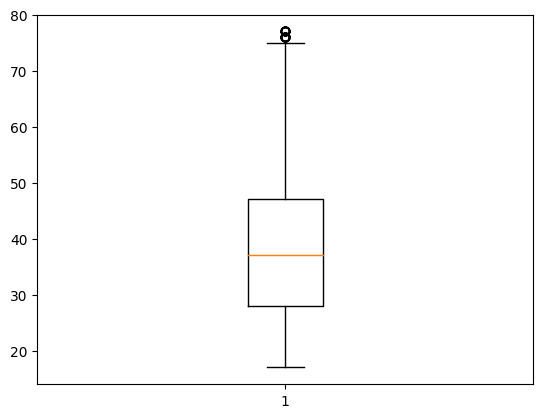

In [63]:
plt.boxplot(no_outlier['age'])

In [64]:
Q1 = df['education.num'].quantile(0.25)
Q3 = df['education.num'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['education.num']<lower_limit)|(df['education.num']>upper_limit)]

In [65]:
no_outlier =  df[(df['education.num']>lower_limit)&(df['education.num']<upper_limit)]
no_outlier.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
0,90,Private,277.584221,school,3.000000,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0.0,66.000000,40,United-States,0,6.324555
1,82,Private,364.513374,school,3.000000,Married-spouse-absent,Exec-managerial,Not-in-family,White,Female,0.0,66.000000,18,United-States,0,4.242641
2,66,Private,431.347887,college,3.162278,Married-spouse-absent,Prof-specialty,Unmarried,Black,Female,0.0,66.000000,40,United-States,0,6.324555
4,41,Private,514.454080,college,3.162278,Married-spouse-absent,Prof-specialty,Own-child,White,Female,0.0,62.449980,40,United-States,0,6.324555
5,34,Private,465.686590,school,3.000000,Married-spouse-absent,Other-service,Unmarried,White,Female,0.0,61.400326,45,United-States,0,6.708204


{'boxes': [<matplotlib.lines.Line2D at 0x7f6ec464f610>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6ec4666c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ec4680390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ec46dfc10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6ec4666290>,
  <matplotlib.lines.Line2D at 0x7f6ec4666390>]}

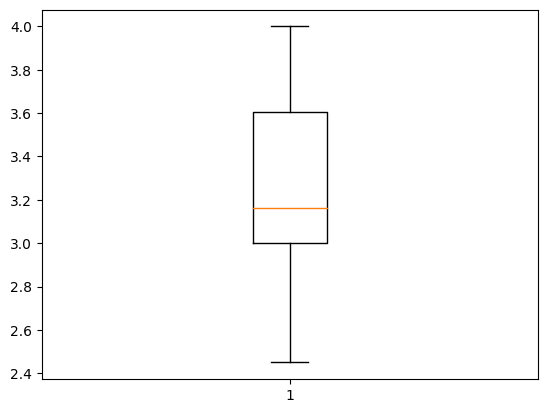

In [66]:
plt.boxplot(no_outlier['education.num'])

In [67]:
Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['fnlwgt']<lower_limit)|(df['fnlwgt']>upper_limit)]

In [68]:
no_outlier =  df[(df['fnlwgt']>lower_limit)&(df['fnlwgt']<upper_limit)]
no_outlier.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
0,90,Private,277.584221,school,3.000000,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0.0,66.00000,40,United-States,0,6.324555
1,82,Private,364.513374,school,3.000000,Married-spouse-absent,Exec-managerial,Not-in-family,White,Female,0.0,66.00000,18,United-States,0,4.242641
2,66,Private,431.347887,college,3.162278,Married-spouse-absent,Prof-specialty,Unmarried,Black,Female,0.0,66.00000,40,United-States,0,6.324555
3,54,Private,374.645165,school,2.000000,Married-spouse-absent,Machine-op-inspct,Unmarried,White,Female,0.0,62.44998,40,United-States,0,6.324555
4,41,Private,514.454080,college,3.162278,Married-spouse-absent,Prof-specialty,Own-child,White,Female,0.0,62.44998,40,United-States,0,6.324555


{'boxes': [<matplotlib.lines.Line2D at 0x7f6ec4727e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6ec47f6b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ec479f0d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ec479f590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6ec47f6410>,
  <matplotlib.lines.Line2D at 0x7f6ec47f6950>]}

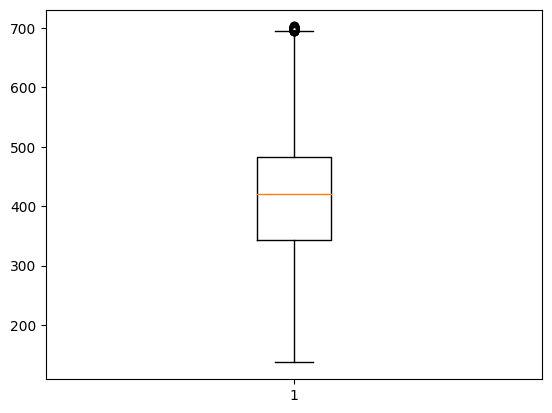

In [69]:
plt.boxplot(no_outlier['fnlwgt'])

In [70]:
Q1 = df['capital.gain'].quantile(0.25)
Q3 = df['capital.gain'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['capital.gain']<lower_limit)|(df['capital.gain']>upper_limit)]

In [71]:
no_outlier =  df[(df['capital.gain']>lower_limit)&(df['capital.gain']<upper_limit)]
no_outlier.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week


{'boxes': [<matplotlib.lines.Line2D at 0x7f6ec483b590>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6ec48bef50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ec48a14d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ec48b8d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6ec48be510>,
  <matplotlib.lines.Line2D at 0x7f6ec48be250>]}

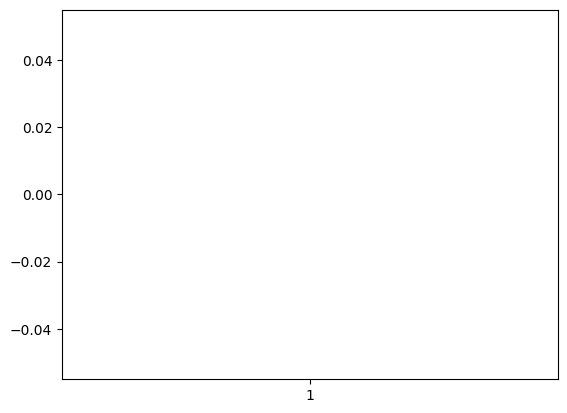

In [72]:
plt.boxplot(no_outlier['capital.gain'])

In [73]:
Q1 = df['capital.loss'].quantile(0.25)
Q3 = df['capital.loss'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['capital.loss']<lower_limit)|(df['capital.loss']>upper_limit)]

In [74]:
no_outlier =  df[(df['capital.loss']>lower_limit)&(df['capital.loss']<upper_limit)]
no_outlier.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week


{'boxes': [<matplotlib.lines.Line2D at 0x7f6ec48d6290>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6ec4981490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ec48c3750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ec48c3f50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6ec48d64d0>,
  <matplotlib.lines.Line2D at 0x7f6ec4981dd0>]}

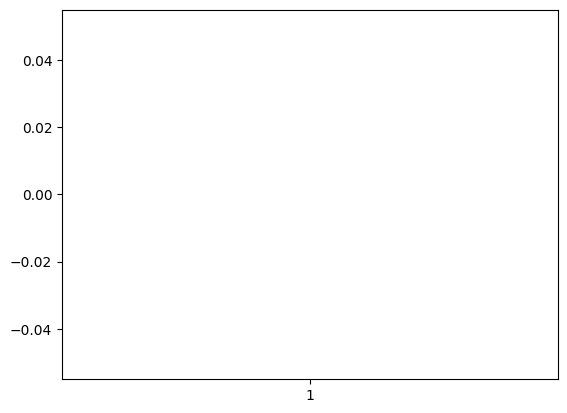

In [75]:
plt.boxplot(no_outlier['capital.loss'])

In [76]:
Q1 = df['hour.per.week'].quantile(0.25)
Q3 = df['hour.per.week'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['hour.per.week']<lower_limit)|(df['hour.per.week']>upper_limit)]

In [77]:
no_outlier =  df[(df['hour.per.week']>lower_limit)&(df['hour.per.week']<upper_limit)]
no_outlier.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
0,90,Private,277.584221,school,3.000000,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0.0,66.000000,40,United-States,0,6.324555
2,66,Private,431.347887,college,3.162278,Married-spouse-absent,Prof-specialty,Unmarried,Black,Female,0.0,66.000000,40,United-States,0,6.324555
3,54,Private,374.645165,school,2.000000,Married-spouse-absent,Machine-op-inspct,Unmarried,White,Female,0.0,62.449980,40,United-States,0,6.324555
4,41,Private,514.454080,college,3.162278,Married-spouse-absent,Prof-specialty,Own-child,White,Female,0.0,62.449980,40,United-States,0,6.324555
5,34,Private,465.686590,school,3.000000,Married-spouse-absent,Other-service,Unmarried,White,Female,0.0,61.400326,45,United-States,0,6.708204


{'boxes': [<matplotlib.lines.Line2D at 0x7f6ec4a0df90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6ec4a28b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ec4a82610>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ec4a824d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6ec4a28d50>,
  <matplotlib.lines.Line2D at 0x7f6ec4a28390>]}

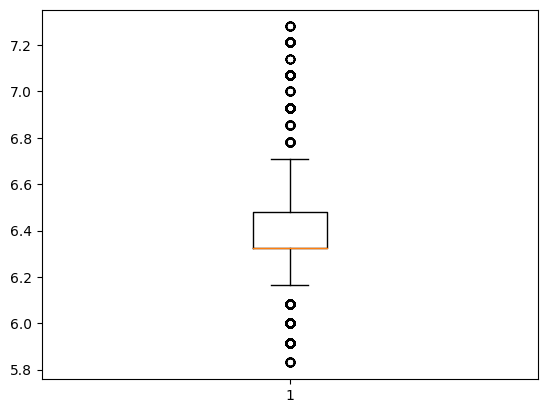

In [78]:
plt.boxplot(no_outlier['hour.per.week'])

ONEHOTENCODING

In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['workclass','education','marital.status','occupation','relationship','race','sex','native.country']
for col in cols:
  df[col] = le.fit_transform(df[col])


In [80]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
0,90,1,277.584221,3,3.000000,1,9,1,4,0,0.0,66.00000,40,38,0,6.324555
1,82,1,364.513374,3,3.000000,1,3,1,4,0,0.0,66.00000,18,38,0,4.242641
2,66,1,431.347887,2,3.162278,1,9,4,2,0,0.0,66.00000,40,38,0,6.324555
3,54,1,374.645165,3,2.000000,1,6,4,4,0,0.0,62.44998,40,38,0,6.324555
4,41,1,514.454080,2,3.162278,1,9,3,4,0,0.0,62.44998,40,38,0,6.324555


In [81]:
df.isnull().sum().sum()

0

In [82]:
X = df.drop(['income'],axis = 1)
y = df['income']

In [83]:
print(X.ndim)
print(y.ndim)

2
1


TRAIN TEST SPLIT 80/20

In [84]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler            #------- IMPORTING STANDARD SCALAR FOR SCALING
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,train_size=0.8)

In [86]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (26048, 15)
Number transactions y_train dataset:  (26048,)
Number transactions X_test dataset:  (6513, 15)
Number transactions y_test dataset:  (6513,)


In [87]:
ss = StandardScaler()
ss.fit_transform(X_train,y_train)
ss.transform(X_test)

array([[-1.44063808, -0.51890525, -0.90694136, ..., -0.03339182,
         0.260811  ,  0.05268941],
       [-0.48580145, -0.51890525, -0.51158584, ...,  0.37172696,
         0.260811  ,  0.41654232],
       [ 0.32213724, -0.51890525, -1.05255358, ..., -0.03339182,
         0.260811  ,  0.05268941],
       ...,
       [ 0.98317799, -0.51890525,  1.53229711, ...,  0.77684574,
         0.260811  ,  0.76068295],
       [ 1.49732079,  0.19383699,  0.7293549 , ...,  1.58708329,
         0.260811  ,  1.40075803],
       [-0.41235248, -0.51890525, -0.43198392, ..., -0.84362937,
         0.260811  , -0.75091935]])

In [88]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
folds = StratifiedKFold(n_splits = 3)
cvs = cross_val_score
          

## LOGISTIC REGRESSION

In [89]:
from sklearn.linear_model import LogisticRegression     
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8108398587440504

In [90]:
#USING CROSSVALIDATION ON TRAIN DATA
lr_score = cvs(lr,X_train,y_train ,cv = 5)
average = np.average(lr_score)
average

0.807240340338164

In [91]:
# USING CROSSVALIDATION ON TEST DATA
lr_score = cvs(lr,X_test,y_test ,cv = 5)
average = np.average(lr_score)
average

0.809304181653351

In [92]:
lr_predict =lr.predict(X_test)

In [93]:
data = pd.DataFrame(data={"Predicted income":lr_predict.flatten(),"Actual income":y_test})
data.head(10)

,Predicted income,Actual income
29106,0,0
8955,1,0
14053,0,0
15960,0,0
399,1,1
27017,0,0
8763,1,0
30427,0,0
4475,0,1
23887,0,0


In [94]:
lr_predict_proba = lr.predict_proba(X_test)
lr_predict_proba

array([[0.98207959, 0.01792041],
       [0.33764991, 0.66235009],
       [0.98013776, 0.01986224],
       ...,
       [0.85272867, 0.14727133],
       [0.8671329 , 0.1328671 ],
       [0.01040891, 0.98959109]])

In [95]:
lr.classes_

array(['0', '1'], dtype=object)

In [96]:
print( classification_report(y_test, lr_predict))    

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4973
           1       0.66      0.41      0.51      1540

    accuracy                           0.81      6513
   macro avg       0.75      0.67      0.70      6513
weighted avg       0.80      0.81      0.79      6513



ROC CURVE on imbalance dataset

In [97]:
from sklearn.metrics import roc_auc_score,plot_roc_curve,plot_precision_recall_curve   

In [98]:
roc_auc_score(y_test,lr_predict)

0.6735154248526459

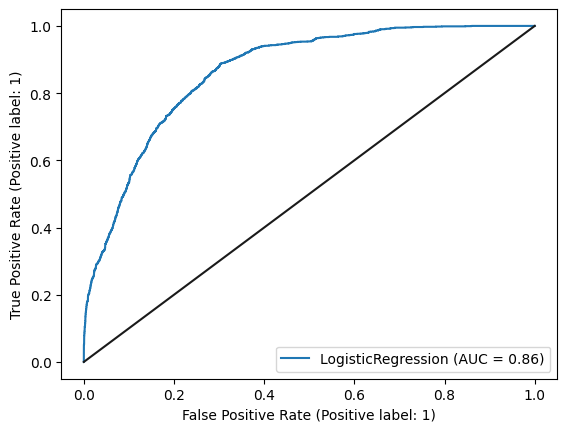

In [99]:
plot_roc_curve(lr,X_test,y_test)
plt.plot([0,1],[0,1], c='k')    #------ base line classifier

In [100]:
y_test.value_counts()

0    4973
1    1540
Name: income, dtype: int64

In [101]:
1547/6513    #---- 6513

0.2375249500998004

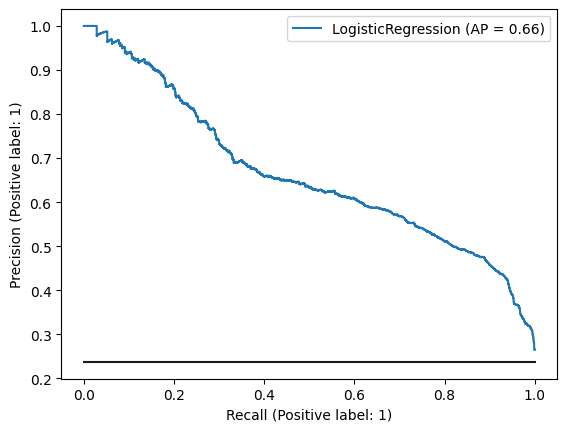

In [102]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(lr,X_test,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')


## **SMOTE**

In [103]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification

In [104]:
sm = SMOTE()
X_sm,y_sm = sm.fit_resample(X_train,y_train)

LOGISTIG REGRESSION

In [105]:
lr_sm = LogisticRegression()
lr_sm.fit(X_sm,y_sm)
print("The score of logistic Regression after using SMOTE : ",lr_sm.score(X_test,y_test))

The score of logistic Regression after using SMOTE :  0.7847382158759404


CROSS VALIDATION LOGISTIC REGRESSION

In [106]:
lr_sm_cvs = cvs(lr_sm,X_sm,y_sm, cv=5)
score_lr_sm_cvs = np.average(lr_sm_cvs)
score_lr_sm_cvs

0.825316009273959

In [107]:
lr_sm_predict = lr_sm.predict(X_test)

In [108]:
data = pd.DataFrame(data={"Predicted income":lr_sm_predict, "Actual income":y_test})
data.head(10)

,Predicted income,Actual income
29106,0,0
8955,1,0
14053,0,0
15960,0,0
399,1,1
27017,0,0
8763,1,0
30427,0,0
4475,1,1
23887,0,0


In [109]:
print(classification_report(y_test,lr_sm_predict))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4973
           1       0.53      0.77      0.63      1540

    accuracy                           0.78      6513
   macro avg       0.72      0.78      0.74      6513
weighted avg       0.83      0.78      0.80      6513



ROC curve of LOGISTIC REGRESSION

In [110]:
from sklearn.metrics import roc_auc_score,plot_roc_curve,plot_precision_recall_curve   

In [111]:
roc_auc_score(y_test,lr_sm_predict)

0.7783511481480516

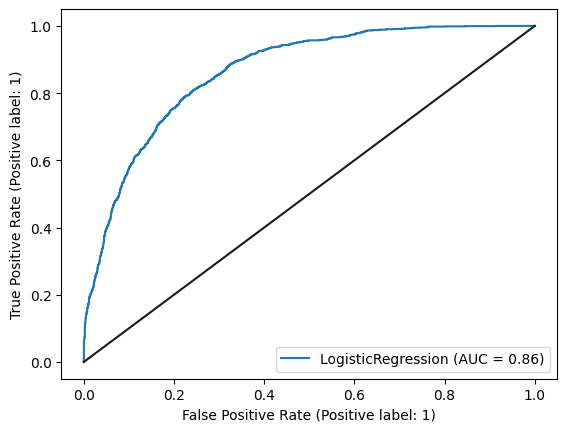

In [112]:
plot_roc_curve(lr_sm,X_test,y_test)
plt.plot([0,1],[0,1], c='k')    #------ base line classifier

In [113]:
y_test.value_counts()

0    4973
1    1540
Name: income, dtype: int64

In [114]:
1547/6513  

0.2375249500998004

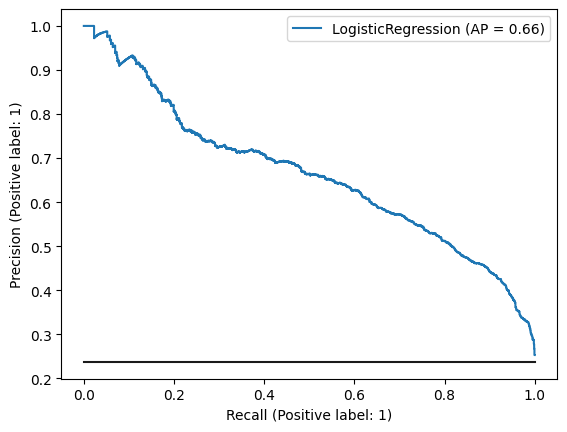

In [115]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(lr_sm,X_test,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')

# RANDOM FOREST using SMOTE

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_sm,y_sm)
print("The score of Random Forest after using SMOTE :",rf.score(X_test,y_test))

The score of Random Forest after using SMOTE : 0.8453861507753724


### CROSSVALIDATION

In [117]:
rf_cvs = cvs(rf,X_sm,y_sm,cv=5)
score_rf_cvs = np.average(rf_cvs)
score_rf_cvs

0.8908453621758186

In [118]:
rf_predict = rf.predict(X_test)

In [119]:
data = pd.DataFrame(data={"Predicted income":rf_predict,"Actual income":y_test})
data.head(10)

,Predicted income,Actual income
29106,0,0
8955,1,0
14053,0,0
15960,0,0
399,1,1
27017,0,0
8763,0,0
30427,0,0
4475,1,1
23887,0,0


In [120]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      4973
           1       0.68      0.65      0.67      1540

    accuracy                           0.85      6513
   macro avg       0.79      0.78      0.78      6513
weighted avg       0.84      0.85      0.84      6513



ROC curve of RANDOM FOREST

In [121]:
roc_auc_score(y_test,rf_predict)

0.779290702259735

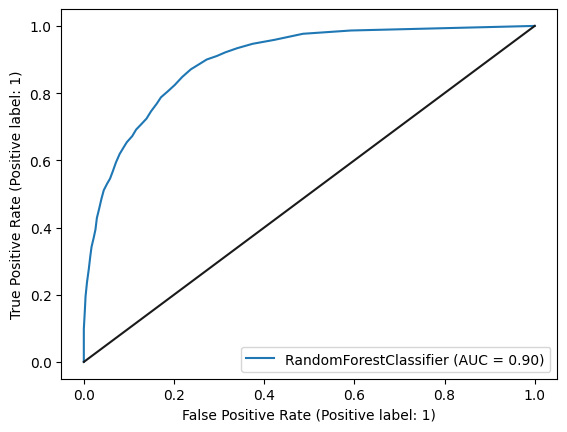

In [122]:
plot_roc_curve(rf,X_test,y_test)
plt.plot([0,1],[0,1], c='k') 

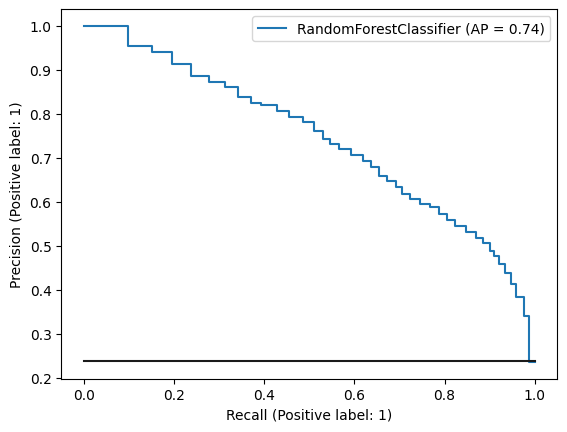

In [123]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(rf,X_test,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')

## XGBOOST USING SMOTE

In [124]:
import xgboost as xgb
model=xgb.XGBClassifier(learning_rate=0.1,max_depth=50,n_estimators=50)
model.fit(X_sm, y_sm)
print("The score of XGBOOST after using SMOTE : ",model.score(X_test,y_test))

The score of XGBOOST after using SMOTE :  0.8455396898510671


CROSSVALIDATION USING XGBOOST

In [125]:
cvs_xgboost=cvs(model,X_sm,y_sm,cv=5)
score_cvs_xgboost = np.average(cvs_xgboost)

In [126]:
score_cvs_xgboost

0.8930736237579845

In [127]:
model_predict = model.predict(X_test)

In [128]:
data = pd.DataFrame(data={"Predicted income ":model_predict,"Actual income ":y_test})
data.head(10)

,Predicted income,Actual income
29106,0,0
8955,0,0
14053,0,0
15960,0,0
399,1,1
27017,0,0
8763,0,0
30427,0,0
4475,1,1
23887,0,0


In [129]:
print(classification_report(y_test,model_predict))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4973
           1       0.68      0.64      0.66      1540

    accuracy                           0.85      6513
   macro avg       0.79      0.78      0.78      6513
weighted avg       0.84      0.85      0.84      6513



ROC CURVE OF XGBOOST

In [130]:
roc_auc_score(y_test,model_predict)

0.7755809945132286

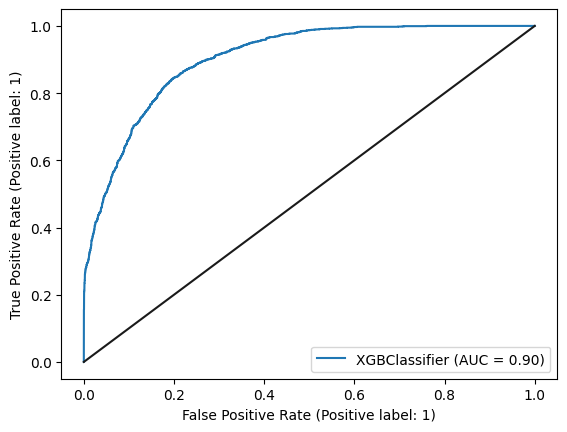

In [131]:
plot_roc_curve(model,X_test,y_test)
plt.plot([0,1],[0,1], c='k') 

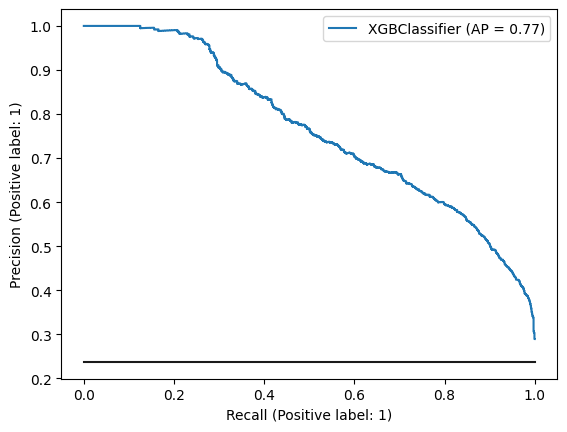

In [132]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(model,X_test,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')

## PCA

In [133]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape                              #-----column become 15 to 2 

(32561, 2)

In [134]:
X_pca       #-----pc1 = 32.3  pc2=-10.4

array([[-141.75172858,   -5.90231525],
       [ -54.71004336,   -7.32378534],
       [  12.20357755,   -7.26535303],
       ...,
       [ -25.98765292,   -7.80218217],
       [ -29.28335048,   -6.73880379],
       [  30.17672202,   -9.79215435]])

In [135]:
#--- it show how much variation it capture
pca.explained_variance_ratio_   
# 0.85240629 , 0.11900622 variation is grab  ie pc1 capture 85% information pc2 capture 11% variation

array([0.90539432, 0.06449958])

In [136]:
pca.n_components_    #---- final feature we have is 2

2

In [137]:
X_train_pca,X_test_pca,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,train_size=0.8,random_state=0)

SMOTE_PCA

In [138]:
sm = SMOTE()
X_sm_pca,y_sm_pca = sm.fit_resample(X_train_pca,y_train)

LOGISTIC REGRESION_PCA

In [139]:
lr_sm_pca = LogisticRegression()
lr_sm_pca.fit(X_sm_pca,y_sm_pca)
print("The score of logistic Regression after using SMOTE  AND PCA: ",lr_sm_pca.score(X_test_pca,y_test))

The score of logistic Regression after using SMOTE  AND PCA:  0.7858129894058038


CROSS VALIDATION OF LOGISTIC_REGRESSION_PCA

In [140]:
lr_sm_cvs_pca = cvs(lr_sm_pca,X_sm_pca,y_sm_pca, cv=5)
score_lr_sm_cvs_pca = np.average(lr_sm_cvs_pca)
score_lr_sm_cvs_pca

0.5850966678221323

In [141]:
lr_sm_predict_pca = lr_sm_pca.predict(X_test_pca)

In [142]:
data = pd.DataFrame(data={"Predicted income":lr_sm_predict_pca, "Actual income":y_test})
data.head(10)

,Predicted income,Actual income
22278,0,0
8950,0,0
7838,0,0
16505,0,0
19140,0,1
12319,0,1
28589,0,0
10000,0,0
28530,0,0
24237,0,1


In [143]:
print(classification_report(y_test,lr_sm_predict_pca))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4966
           1       0.64      0.22      0.33      1547

    accuracy                           0.79      6513
   macro avg       0.72      0.59      0.60      6513
weighted avg       0.76      0.79      0.74      6513



ROC CURVE of LOGISTIC REGRESSION_PCA

In [144]:
roc_auc_score(y_test,lr_sm_predict_pca)

0.5920740023758195

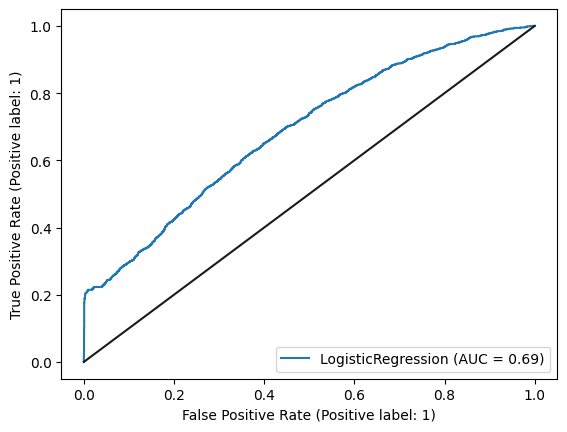

In [145]:
plot_roc_curve(lr_sm_pca,X_test_pca,y_test)
plt.plot([0,1],[0,1], c='k') 

In [146]:
y_test.value_counts()

0    4966
1    1547
Name: income, dtype: int64

In [147]:
1547/6513

0.2375249500998004

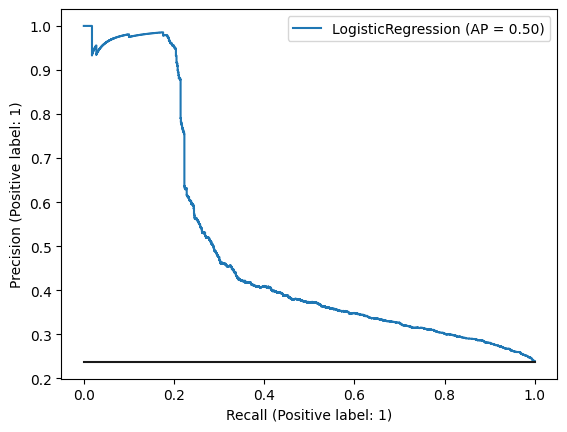

In [148]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(lr_sm_pca,X_test_pca,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')

RANDOM FOREST_PCA

In [149]:
rf_pca = RandomForestClassifier(n_estimators=40)
rf_pca.fit(X_sm_pca,y_sm_pca)
print("The score of Random Forest after using SMOTE and PCA :",rf_pca.score(X_test_pca,y_test))

The score of Random Forest after using SMOTE and PCA : 0.6849378166743436


CROSSVLIDATION_PCA


In [150]:
rf_cvs_pca = cvs(rf_pca,X_sm_pca,y_sm_pca,cv=5)
score_rf_cvs_pca = np.average(rf_cvs_pca)
score_rf_cvs_pca

0.7300044645758792

In [151]:
rf_predict_pca = rf_pca.predict(X_test_pca)

In [152]:
data = pd.DataFrame(data={"Predicted income":rf_predict_pca,"Actual income":y_test})
data.head(10)

,Predicted income,Actual income
22278,0,0
8950,0,0
7838,0,0
16505,0,0
19140,1,1
12319,0,1
28589,1,0
10000,1,0
28530,0,0
24237,1,1


In [153]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      4966
           1       0.23      0.22      0.22      1547

    accuracy                           0.64      6513
   macro avg       0.49      0.49      0.49      6513
weighted avg       0.63      0.64      0.64      6513



ROC CURVE OF RANDOMFOREST_PCA

In [154]:
roc_pca=roc_auc_score(y_test,rf_predict_pca)
roc_pca

0.6480885145036668

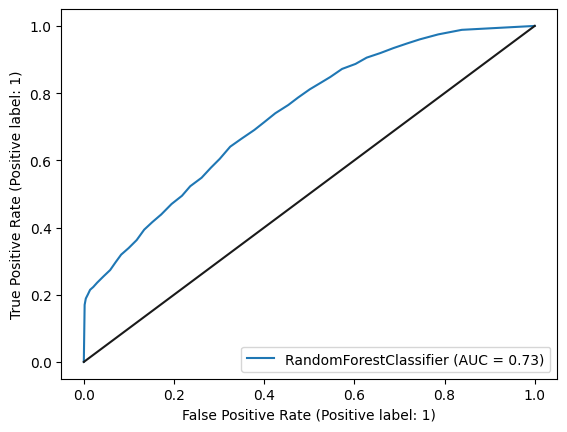

In [155]:
plot_roc_curve(rf_pca,X_test_pca,y_test)
plt.plot([0,1],[0,1], c='k') 

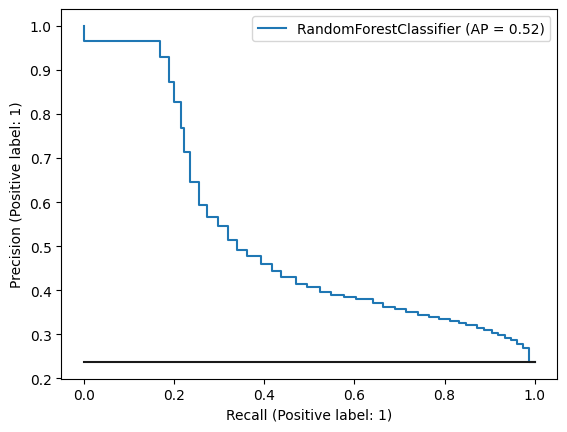

In [156]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(rf_pca,X_test_pca,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')

XGBOOST_PCA

In [157]:
import xgboost as xgb
model_pca=xgb.XGBClassifier(learning_rate=0.1,max_depth=50,n_estimators=50)
model_pca.fit(X_sm_pca, y_sm_pca)
print("The score of XGBOOST after using SMOTE AND PCA : ",model_pca.score(X_test_pca,y_test))

The score of XGBOOST after using SMOTE AND PCA :  0.6867802855826808


CROSSVALIDATION OF XGBOOST_PCA

In [158]:
cvs_xgboost_pca=cvs(model,X_sm_pca,y_sm_pca,cv=5)
score_cvs_xgboost_pca = np.average(cvs_xgboost_pca)

In [159]:
score_cvs_xgboost_pca

0.7376484803031542

In [160]:
model_predict_pca = model_pca.predict(X_test_pca)

In [161]:
data = pd.DataFrame(data={"Predicted income ":model_predict_pca,"Actual income ":y_test})
data.head(10)

,Predicted income,Actual income
22278,0,0
8950,0,0
7838,0,0
16505,1,0
19140,1,1
12319,0,1
28589,1,0
10000,1,0
28530,0,0
24237,1,1


In [162]:
print(classification_report(y_test,model_predict_pca))

              precision    recall  f1-score   support

           0       0.85      0.71      0.78      4966
           1       0.39      0.60      0.48      1547

    accuracy                           0.69      6513
   macro avg       0.62      0.66      0.63      6513
weighted avg       0.74      0.69      0.71      6513



ROC CURVE OF XGBOOST_PCA

In [163]:
roc_auc_score(y_test,model_predict_pca)

0.6561948984184894

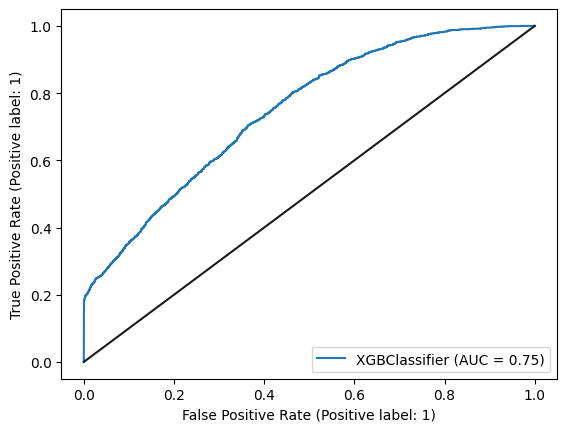

In [164]:
plot_roc_curve(model_pca,X_test_pca,y_test)
plt.plot([0,1],[0,1], c='k') 

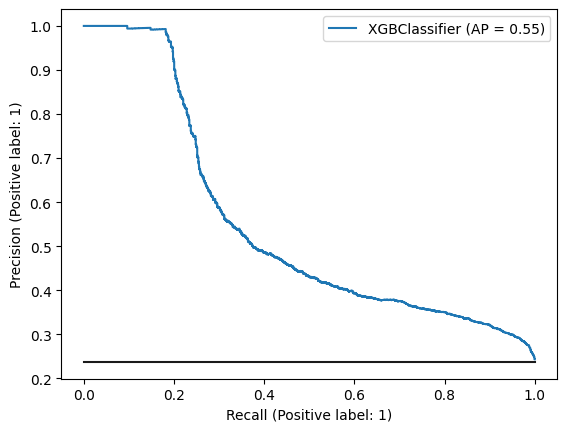

In [165]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(model_pca,X_test_pca,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')

# CLUSTERING

In [166]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
0,90,1,277.584221,3,3.000000,1,9,1,4,0,0.0,66.00000,40,38,0,6.324555
1,82,1,364.513374,3,3.000000,1,3,1,4,0,0.0,66.00000,18,38,0,4.242641
2,66,1,431.347887,2,3.162278,1,9,4,2,0,0.0,66.00000,40,38,0,6.324555
3,54,1,374.645165,3,2.000000,1,6,4,4,0,0.0,62.44998,40,38,0,6.324555
4,41,1,514.454080,2,3.162278,1,9,3,4,0,0.0,62.44998,40,38,0,6.324555


In [167]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.datasets import make_blobs

In [168]:
datasets = make_blobs(n_samples=200,
                      centers = 4,
                      n_features=2,
                      cluster_std=1.6,
                      random_state=50)

In [169]:
points = datasets[0]

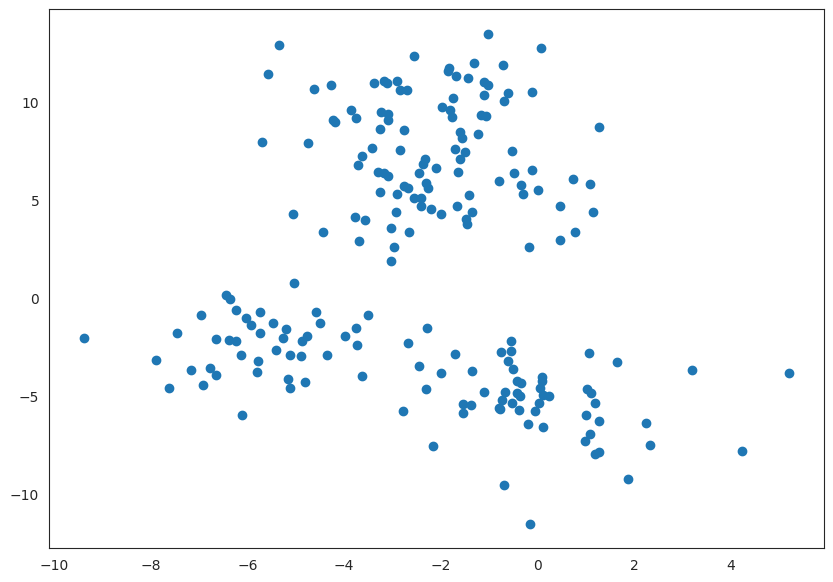

In [170]:
plt.figure(figsize=(10,7))
sns.set_style('white')
plt.scatter(datasets[0][:,0],datasets[0][:,1])

In [171]:
k = range(1,11)
wss= []
points = datasets[0]
for i in k:
  km = KMeans(n_clusters=i)
  km.fit(points)
  wss.append(km.inertia_)     

In [172]:
my_centers = pd.DataFrame({'Clusters' : k, 'WSS' : wss})
my_centers

,Clusters,WSS
0,1,9167.878428
1,2,2535.479916
2,3,1530.233897
3,4,916.395212
4,5,787.010739
5,6,688.656818
6,7,615.917504
7,8,546.121944
8,9,483.528956
9,10,438.920068


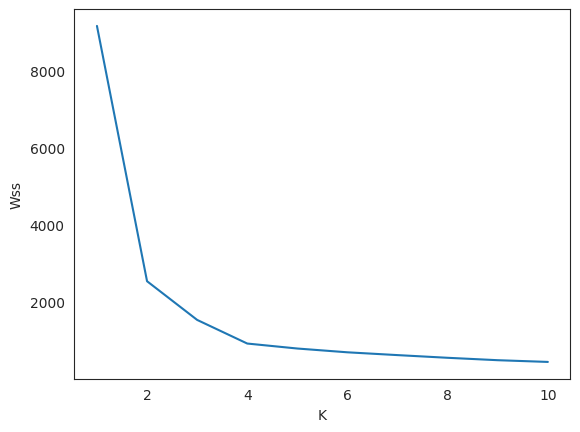

In [173]:
plt.xlabel('K')
plt.ylabel('Wss')
plt.plot(k,wss)

IMPORTING KMEANS

In [174]:
kmeans =cluster.KMeans(n_clusters=4,init="k-means++")
kmeans = kmeans.fit(points)
kmeans

KMeans(n_clusters=4)

CLUSTERS CENTERS

In [175]:
# clusters centers
cluster=kmeans.cluster_centers_
cluster

array([[-2.40167949, 10.17352695],
       [-5.56465793, -2.34988939],
       [ 0.05161133, -5.35489826],
       [-1.92101646,  5.21673484]])

In [176]:
kmeans_predict = kmeans.fit_predict(points)
kmeans_predict

array([2, 1, 0, 2, 3, 1, 2, 1, 1, 3, 3, 2, 3, 0, 3, 0, 2, 2, 3, 3, 3, 0,
       2, 2, 2, 0, 2, 1, 0, 2, 2, 3, 3, 1, 1, 3, 3, 3, 0, 0, 2, 3, 0, 0,
       1, 1, 2, 0, 0, 2, 1, 3, 0, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 1, 1, 2,
       1, 0, 2, 2, 1, 3, 2, 1, 0, 0, 3, 0, 0, 1, 3, 0, 3, 3, 3, 3, 2, 1,
       2, 3, 1, 2, 1, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 2, 0, 1, 0, 1, 3, 2,
       1, 3, 2, 2, 3, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 3, 1,
       1, 0, 2, 0, 1, 2, 2, 3, 2, 0, 0, 1, 3, 2, 1, 0, 1, 3, 2, 3, 0, 1,
       1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 3, 0, 1, 0,
       3, 1, 2, 0, 1, 0, 0, 2, 3, 1, 3, 2, 0, 1, 0, 0, 3, 0, 1, 2, 3, 0,
       3, 2], dtype=int32)

In [177]:
data = pd.DataFrame(data={"Predicted income ":kmeans_predict})
data.head(10)

,Predicted income
0,2
1,1
2,0
3,2
4,3
5,1
6,2
7,1
8,1
9,3


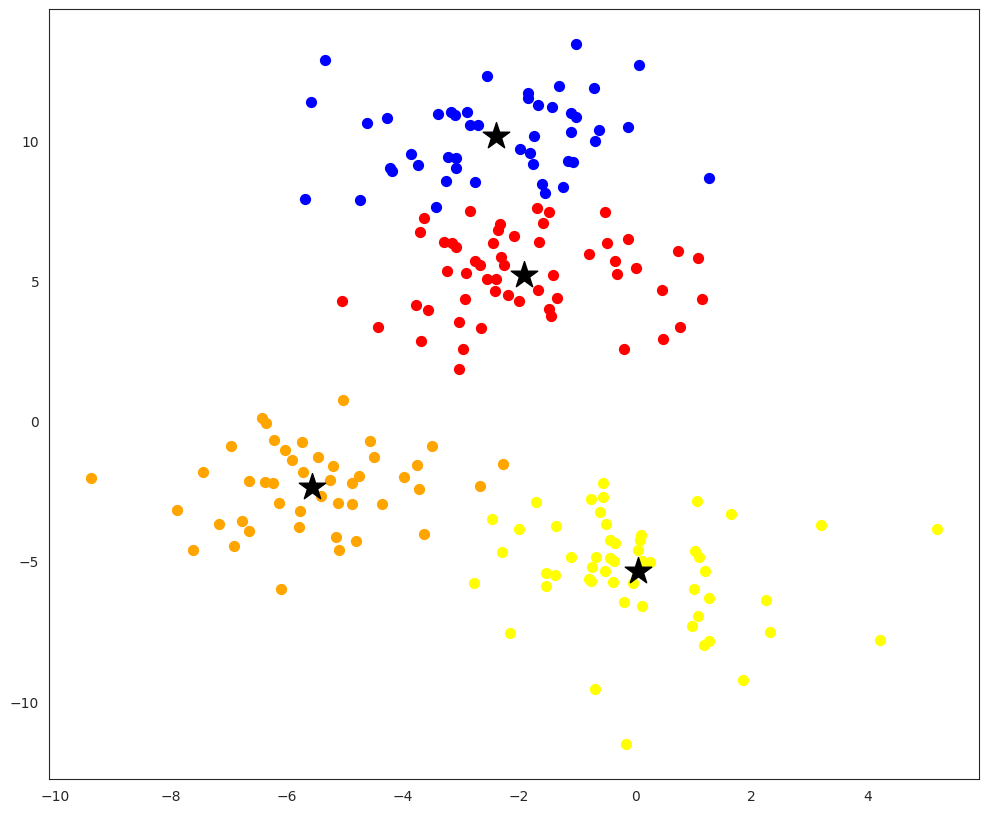

In [178]:
plt.figure(figsize=(12,10))
sns.set_style('white')
plt.scatter(points[kmeans_predict==0,0], points[kmeans_predict==0,1], s=50, color = 'red')
plt.scatter(points[kmeans_predict==1,0], points[kmeans_predict==1,1], s=50, color = 'yellow')
plt.scatter(points[kmeans_predict==2,0], points[kmeans_predict==2,1], s=50, color = 'blue')
plt.scatter(points[kmeans_predict==3,0], points[kmeans_predict==3,1], s=50, color = 'orange')
plt.scatter(cluster[0][0],cluster[0][1],marker='*', s=400 , color = 'black')
plt.scatter(cluster[1][0],cluster[1][1],marker='*', s=400 , color = 'black')
plt.scatter(cluster[2][0],cluster[2][1],marker='*', s=400 , color = 'black')
plt.scatter(cluster[3][0],cluster[3][1],marker='*', s=400 , color = 'black')


In [179]:
#pip install shapash

In [180]:
#pip install shap

In [181]:
#from shap import Explainer
#import shap

In [182]:
#ex=Explainer

In [183]:
#sp = shap.Explainer(model=rf)

In [184]:
#shap_values=sp(X)

In [185]:
#shap.plots.waterfall(shap_values[0])

In [186]:
#from shapash import SmartExplainer

In [187]:
#sm =SmartExplainer

In [188]:
#sm(model=rf,backend='shap', preprocessing=labelencoder)